# Precificação de Imóveis
### Regressão Linear


# Dataset

Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Imports

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Abertura e primeiras características dos dataset

In [47]:
dados = pd.read_csv('/content/drive/MyDrive/Projetos/Precificação de imóveis com Regressão Linear/data/HousePrices_HalfMil.csv')
dados.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [48]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


## Estatíticas descritivas

In [49]:
dados.describe().round(2)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.0,500000.00,500000.0,500000.0,500000.0,500000.0,500000.0,500000.0,500000.00
mean,124.93,2.00,2.00,3.00,0.33,0.33,0.33,0.5,2.00,0.5,0.5,0.5,0.5,0.5,0.5,42050.14
std,71.80,0.82,1.41,1.41,0.47,0.47,0.47,0.5,0.82,0.5,0.5,0.5,0.5,0.5,0.5,12110.24
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,7725.00
25%,63.00,1.00,1.00,2.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,33500.00
50%,125.00,2.00,2.00,3.00,0.00,0.00,0.00,0.0,2.00,0.0,1.0,1.0,0.0,1.0,1.0,41850.00
75%,187.00,3.00,3.00,4.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.0,1.0,1.0,1.0,50750.00
max,249.00,3.00,4.00,5.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.0,1.0,1.0,1.0,77975.00


## Coeficientes de correlação

In [50]:
dados.corr().round(4)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.0000,-0.0009,0.0004,-0.0004,0.0025,-0.0015,-0.0010,-0.0008,-0.0035,0.0005,-0.0001,0.0001,-0.0012,0.0006,0.0014,0.1477
Garage,-0.0009,1.0000,0.0013,-0.0036,0.0005,0.0018,-0.0024,-0.0009,0.0008,0.0015,0.0008,-0.0006,-0.0022,0.0011,-0.0007,0.1003
FirePlace,0.0004,0.0013,1.0000,0.0006,0.0010,-0.0009,-0.0000,0.0002,-0.0002,-0.0003,0.0013,0.0018,-0.0004,0.0013,0.0002,0.0891
Baths,-0.0004,-0.0036,0.0006,1.0000,0.0025,-0.0027,0.0002,-0.0009,-0.0009,-0.0008,0.0010,-0.0007,-0.0017,0.0022,0.0017,0.1451
White Marble,0.0025,0.0005,0.0010,0.0025,1.0000,-0.4989,-0.5007,0.0001,-0.0009,-0.0016,0.0006,-0.0006,-0.0004,-0.0019,0.0010,0.4482
Black Marble,-0.0015,0.0018,-0.0009,-0.0027,-0.4989,1.0000,-0.5004,-0.0004,-0.0003,0.0018,-0.0005,0.0001,0.0001,0.0007,0.0001,-0.0780
Indian Marble,-0.0010,-0.0024,-0.0000,0.0002,-0.5007,-0.5004,1.0000,0.0003,0.0012,-0.0002,-0.0000,0.0005,0.0003,0.0012,-0.0011,-0.3698
Floors,-0.0008,-0.0009,0.0002,-0.0009,0.0001,-0.0004,0.0003,1.0000,-0.0006,-0.0027,0.0001,0.0014,-0.0000,-0.0002,-0.0005,0.6195
City,-0.0035,0.0008,-0.0002,-0.0009,-0.0009,-0.0003,0.0012,-0.0006,1.0000,0.0005,0.0008,-0.0027,0.0008,0.0003,0.0012,0.2333
Solar,0.0005,0.0015,-0.0003,-0.0008,-0.0016,0.0018,-0.0002,-0.0027,0.0005,1.0000,0.0019,0.0002,-0.0008,-0.0005,-0.0043,0.0084


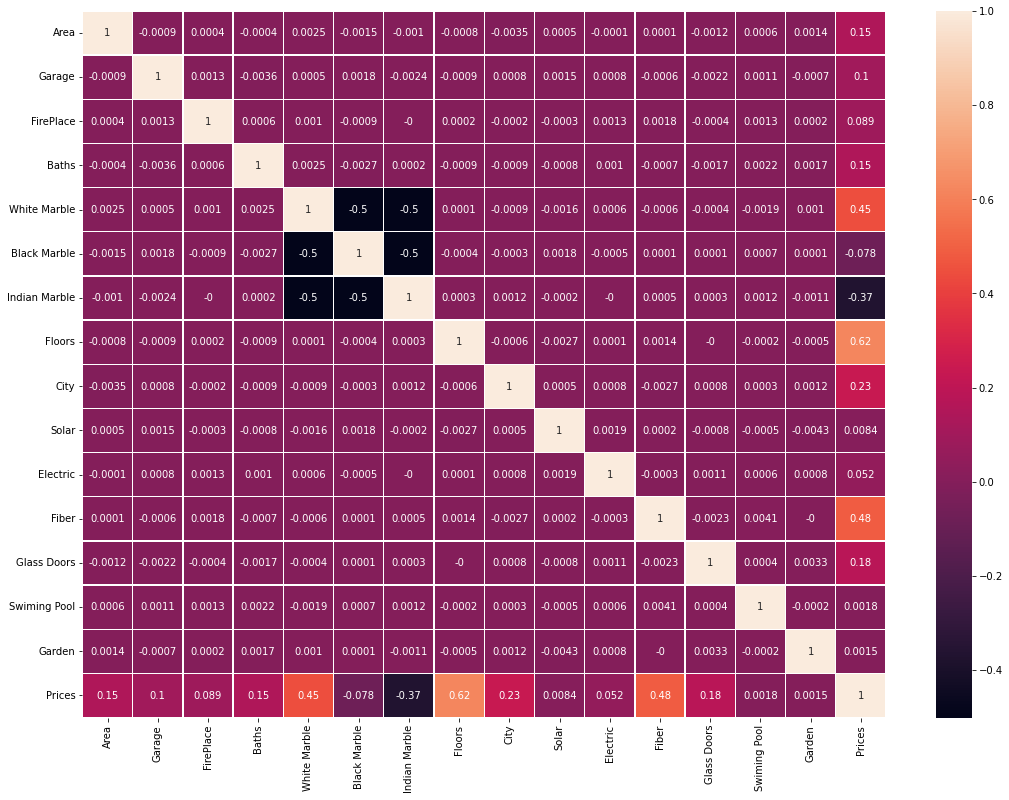

In [51]:
fig, ax = plt.subplots(figsize = (18,13))
sns.heatmap(dados.corr().round(4), annot = True, ax = ax, linewidths = 0.4)

* As presenças de acabamentos de mármore de diversas cores possuem uma forte correlação entre si, a de maior amplitude dentre todas as variáveis (-0.5).

* Todas as outras variáveis têm correlações entre si muito próximas a zero.

# Tratamentos sobre os dados

## Acabamentos de mármore

In [52]:
(dados['White Marble'] + dados['Black Marble'] + dados['Indian Marble']).unique()

array([1])

* Todos os imóveis têm exatamente um tipo de acabamento de mármore. Como a correlação entre as três variáveis é muito alta, optei por removê-las do dataset.

In [53]:
dados.drop(columns = ['White Marble', 'Black Marble', 'Indian Marble'], inplace = True)
dados.head()

,Area,Garage,FirePlace,Baths,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,2,1,0,0,1,1,1,52400


* Não considerei necessárias mais alterações no dataset antes das primeiras análises.

# Comportamentos da variável dependente (Prices)

In [55]:
# Estilização
sns.set_palette('cool')
sns.set_style('darkgrid')

## Boxplot preços dos imóveis

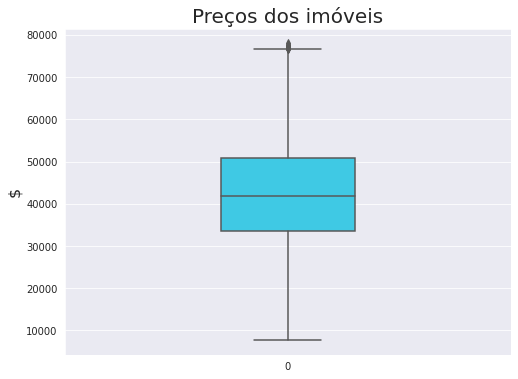

In [65]:
ax = sns.boxplot(data = dados['Prices'], width = 0.3)

ax.figure.set_size_inches(8,6)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_ylabel('$', fontsize = 16)

plt.show()

* O dataset possui alguns pontos discrepantes, mas não os considerei distorcidos o suficiente para trabalhar uma remoção de outliers.

## Distribuição de frequências da variável dependente (y)

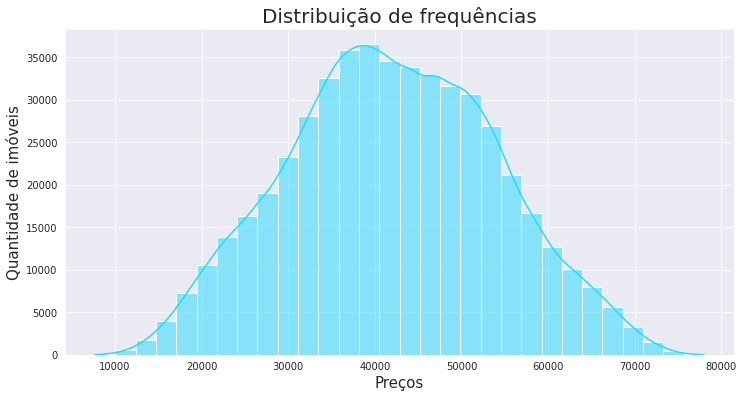

In [74]:
ax = sns.histplot(data = dados['Prices'], kde = True, bins = 30)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências', fontsize = 20)
ax.set_xlabel('Preços', fontsize = 15)
ax.set_ylabel('Quantidade de imóveis', fontsize = 15)

plt.show()

* A variável dependente (Prices) tem uma distribuição de frequências mais próxima da simétrica e tende a seguir uma distribuição normal.